# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import requests
import json
import random
import numpy as np
from citipy import citipy

# API key
from config import weather_api_key
from config import g_key



In [2]:
# cvs file
city_data_df = "../output_data/cities.csv"

# range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# set up list to hold response info
lat_lng = []
cities = []


# generate random list for latitudes and longitudes
#https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html

lats = np.random.uniform(lat_range[0], lat_range[1], size=1200)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1200)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)



518

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# create base url 
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"



In [8]:
# build partial query url
query_url = f"{url}appid={weather_api_key}&units={units}&q="


# set up list to hold response info (temperature, humidity, cloudiness, wind speed)
lat = []
lng = []
temp = []
humid = []
cloud = []
wind = []
dates = []
city_num = 1
city_name = []

# loop through the list of cities and perform a request for data on each

print("Beginning Data Retrieval")
print("------------------------------------")

count = 0
set = 1
for city in cities:
    count = count +1
    if count == 518:
        count = 1
        set = set + 1
    print(f"Processing Record {city_num} of Set {set} | {city}")
    response = requests.get(query_url + city).json()


# some cities don't have data, set them t numpy's NaN  
    try:
        city_name.append(response["name"])
        lng.append(response["coord"]["lon"])
        lat.append(response["coord"]["lat"])
        temp.append(response["main"]["temp_max"])
        humid.append(response["main"]["humidity"])
        cloud.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
        dates.append(response["dt"])
        city_num = city_num + 1
    except KeyError:
        city_name.append(np.nan)
        lng.append(np.nan)
        lat.append(np.nan)
        temp.append(np.nan)
        humid.append(np.nan)
        cloud.append(np.nan)
        wind.append(np.nan)
        dates.append(np.nan)
        city_num = city_num + 1
        print(f" City not found. Skipping...")
        
    print("------------------------------------")
    print(f"Data Retreival Complete")      
    print("------------------------------------")

Beginning Data Retrieval
------------------------------------
Processing Record 1 of Set 1 | esperance
------------------------------------
Data Retreival Complete
------------------------------------
Processing Record 2 of Set 1 | touros
------------------------------------
Data Retreival Complete
------------------------------------
Processing Record 3 of Set 1 | new norfolk
------------------------------------
Data Retreival Complete
------------------------------------
Processing Record 4 of Set 1 | mataura
------------------------------------
Data Retreival Complete
------------------------------------
Processing Record 5 of Set 1 | curaca
------------------------------------
Data Retreival Complete
------------------------------------
Processing Record 6 of Set 1 | maumere
------------------------------------
Data Retreival Complete
------------------------------------
Processing Record 7 of Set 1 | butaritari
------------------------------------
Data Retreival Complete
---------

------------------------------------
Data Retreival Complete
------------------------------------
Processing Record 60 of Set 1 | bambous virieux
------------------------------------
Data Retreival Complete
------------------------------------
Processing Record 61 of Set 1 | torbay
------------------------------------
Data Retreival Complete
------------------------------------
Processing Record 62 of Set 1 | beringovskiy
------------------------------------
Data Retreival Complete
------------------------------------
Processing Record 63 of Set 1 | iqaluit
------------------------------------
Data Retreival Complete
------------------------------------
Processing Record 64 of Set 1 | san quintin
------------------------------------
Data Retreival Complete
------------------------------------
Processing Record 65 of Set 1 | louisbourg
 City not found. Skipping...
------------------------------------
Data Retreival Complete
------------------------------------
Processing Record 66 of Se

------------------------------------
Data Retreival Complete
------------------------------------
Processing Record 118 of Set 1 | netivot
------------------------------------
Data Retreival Complete
------------------------------------
Processing Record 119 of Set 1 | brejo santo
------------------------------------
Data Retreival Complete
------------------------------------
Processing Record 120 of Set 1 | kahului
------------------------------------
Data Retreival Complete
------------------------------------
Processing Record 121 of Set 1 | alta floresta
------------------------------------
Data Retreival Complete
------------------------------------
Processing Record 122 of Set 1 | tasiilaq
------------------------------------
Data Retreival Complete
------------------------------------
Processing Record 123 of Set 1 | lasa
------------------------------------
Data Retreival Complete
------------------------------------
Processing Record 124 of Set 1 | longyearbyen
--------------

------------------------------------
Data Retreival Complete
------------------------------------
Processing Record 178 of Set 1 | hambantota
------------------------------------
Data Retreival Complete
------------------------------------
Processing Record 179 of Set 1 | manuk mangkaw
------------------------------------
Data Retreival Complete
------------------------------------
Processing Record 180 of Set 1 | abha
------------------------------------
Data Retreival Complete
------------------------------------
Processing Record 181 of Set 1 | deming
------------------------------------
Data Retreival Complete
------------------------------------
Processing Record 182 of Set 1 | langarud
------------------------------------
Data Retreival Complete
------------------------------------
Processing Record 183 of Set 1 | quatre cocos
------------------------------------
Data Retreival Complete
------------------------------------
Processing Record 184 of Set 1 | baruun-urt
-------------

------------------------------------
Data Retreival Complete
------------------------------------
Processing Record 236 of Set 1 | avera
------------------------------------
Data Retreival Complete
------------------------------------
Processing Record 237 of Set 1 | ahar
------------------------------------
Data Retreival Complete
------------------------------------
Processing Record 238 of Set 1 | mlowo
------------------------------------
Data Retreival Complete
------------------------------------
Processing Record 239 of Set 1 | sao jose da coroa grande
------------------------------------
Data Retreival Complete
------------------------------------
Processing Record 240 of Set 1 | hit
------------------------------------
Data Retreival Complete
------------------------------------
Processing Record 241 of Set 1 | olinda
------------------------------------
Data Retreival Complete
------------------------------------
Processing Record 242 of Set 1 | carauari
---------------------

------------------------------------
Data Retreival Complete
------------------------------------
Processing Record 295 of Set 1 | alyangula
------------------------------------
Data Retreival Complete
------------------------------------
Processing Record 296 of Set 1 | suhut
------------------------------------
Data Retreival Complete
------------------------------------
Processing Record 297 of Set 1 | laje
------------------------------------
Data Retreival Complete
------------------------------------
Processing Record 298 of Set 1 | saleaula
 City not found. Skipping...
------------------------------------
Data Retreival Complete
------------------------------------
Processing Record 299 of Set 1 | taoudenni
------------------------------------
Data Retreival Complete
------------------------------------
Processing Record 300 of Set 1 | aviles
------------------------------------
Data Retreival Complete
------------------------------------
Processing Record 301 of Set 1 | smoky l

------------------------------------
Data Retreival Complete
------------------------------------
Processing Record 355 of Set 1 | tala
------------------------------------
Data Retreival Complete
------------------------------------
Processing Record 356 of Set 1 | pampa
------------------------------------
Data Retreival Complete
------------------------------------
Processing Record 357 of Set 1 | bathsheba
------------------------------------
Data Retreival Complete
------------------------------------
Processing Record 358 of Set 1 | sarangani
------------------------------------
Data Retreival Complete
------------------------------------
Processing Record 359 of Set 1 | dosso
------------------------------------
Data Retreival Complete
------------------------------------
Processing Record 360 of Set 1 | tautira
------------------------------------
Data Retreival Complete
------------------------------------
Processing Record 361 of Set 1 | gangotri
 City not found. Skipping...


------------------------------------
Data Retreival Complete
------------------------------------
Processing Record 413 of Set 1 | mount vernon
------------------------------------
Data Retreival Complete
------------------------------------
Processing Record 414 of Set 1 | port hardy
------------------------------------
Data Retreival Complete
------------------------------------
Processing Record 415 of Set 1 | eyl
------------------------------------
Data Retreival Complete
------------------------------------
Processing Record 416 of Set 1 | guilin
------------------------------------
Data Retreival Complete
------------------------------------
Processing Record 417 of Set 1 | portland
------------------------------------
Data Retreival Complete
------------------------------------
Processing Record 418 of Set 1 | acajutla
------------------------------------
Data Retreival Complete
------------------------------------
Processing Record 419 of Set 1 | goderich
---------------------

------------------------------------
Data Retreival Complete
------------------------------------
Processing Record 473 of Set 1 | allen
------------------------------------
Data Retreival Complete
------------------------------------
Processing Record 474 of Set 1 | morgan city
------------------------------------
Data Retreival Complete
------------------------------------
Processing Record 475 of Set 1 | ibra
------------------------------------
Data Retreival Complete
------------------------------------
Processing Record 476 of Set 1 | vostok
------------------------------------
Data Retreival Complete
------------------------------------
Processing Record 477 of Set 1 | inhambane
------------------------------------
Data Retreival Complete
------------------------------------
Processing Record 478 of Set 1 | mouzakion
 City not found. Skipping...
------------------------------------
Data Retreival Complete
------------------------------------
Processing Record 479 of Set 1 | arys

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# create a data frame & export
# https://datatofish.com/export-dataframe-to-csv/

weather_df = pd.DataFrame({"City": city_name, "Longitude": lng, "Latitude": lat, "Temp. (max)": temp, "Humidity": humid, "Cloudiness": cloud, "Wind Speed": wind, "Dates": dates})
pd.DataFrame.to_csv(weather_df, python-api-challenge)

NameError: name 'python' is not defined

In [10]:
weather_df.head()

,City,Longitude,Latitude,Temp. (max),Humidity,Cloudiness,Wind Speed,Dates
0,Esperance,121.9000,-33.8667,58.84,70.0,75.0,37.38,1.627355e+09
1,Touros,-35.4608,-5.1989,72.50,89.0,5.0,8.70,1.627355e+09
2,New Norfolk,147.0587,-42.7826,60.93,60.0,58.0,5.01,1.627355e+09
3,Mataura,168.8643,-46.1927,52.48,70.0,13.0,4.74,1.627355e+09
4,Curaçá,-39.9094,-8.9903,73.71,65.0,89.0,15.12,1.627355e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

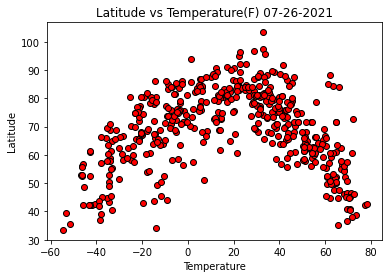

<Figure size 432x288 with 0 Axes>

In [22]:
plt.scatter(lat, temp, marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude vs Temperature(F) 07-26-2021")
plt.xlabel("Temperature")
plt.ylabel("Latitude")
plt.show()
plt.savefig("output_data/Lat_vs_Temp.png")

## Latitude vs. Humidity Plot

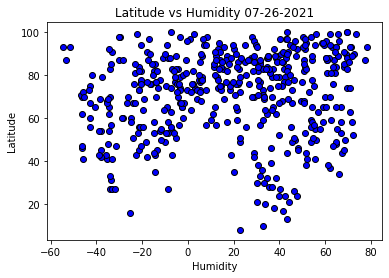

<Figure size 432x288 with 0 Axes>

In [25]:
plt.scatter(lat, humid, marker="o", facecolors="b", edgecolors="black")
plt.title("Latitude vs Humidity 07-26-2021")
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.show()
plt.savefig("output_data/Lat_vs_Humid.png")

## Latitude vs. Cloudiness Plot

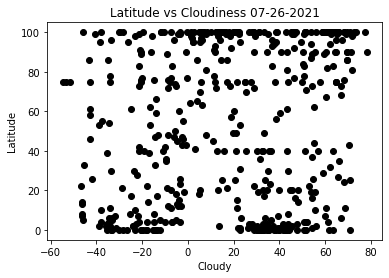

<Figure size 432x288 with 0 Axes>

In [26]:
plt.scatter(lat, cloud, marker="o", facecolors="black", edgecolors="black")
plt.title("Latitude vs Cloudiness 07-26-2021")
plt.xlabel("Cloudy")
plt.ylabel("Latitude")
plt.show()
plt.savefig("output_data/Lat_vs_Cloud.png")

## Latitude vs. Wind Speed Plot

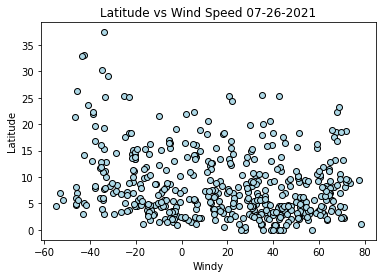

<Figure size 432x288 with 0 Axes>

In [27]:
plt.scatter(lat, wind, marker="o", facecolors="lightblue", edgecolors="black")
plt.title("Latitude vs Wind Speed 07-26-2021")
plt.xlabel("Windy")
plt.ylabel("Latitude")
plt.show()
plt.savefig("output_data/Lat_vs_Wind.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression